In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/CO2_emission_analysis

/gdrive/MyDrive/CO2_emission_analysis


In [ ]:
ls

'CO2 Emissions_Canada.csv'


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('CO2 Emissions_Canada.csv')
df_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

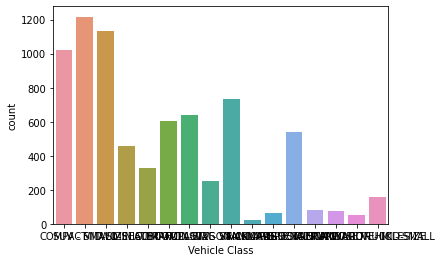

In [ ]:
sns.countplot("Vehicle Class", data=df_train)

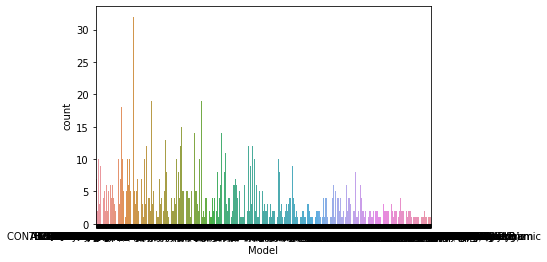

In [ ]:
sns.countplot("Model", data=df_train)

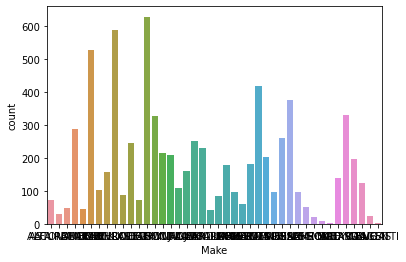

In [ ]:
sns.countplot("Make", data=df_train)

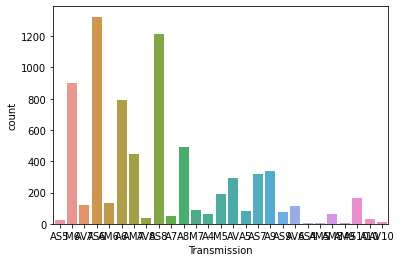

In [ ]:
sns.countplot("Transmission", data=df_train)

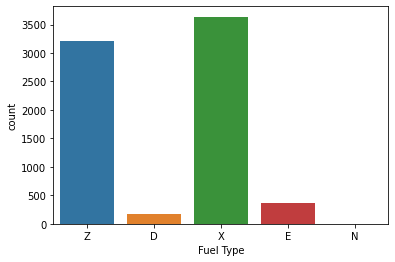

In [ ]:
sns.countplot("Fuel Type", data=df_train)

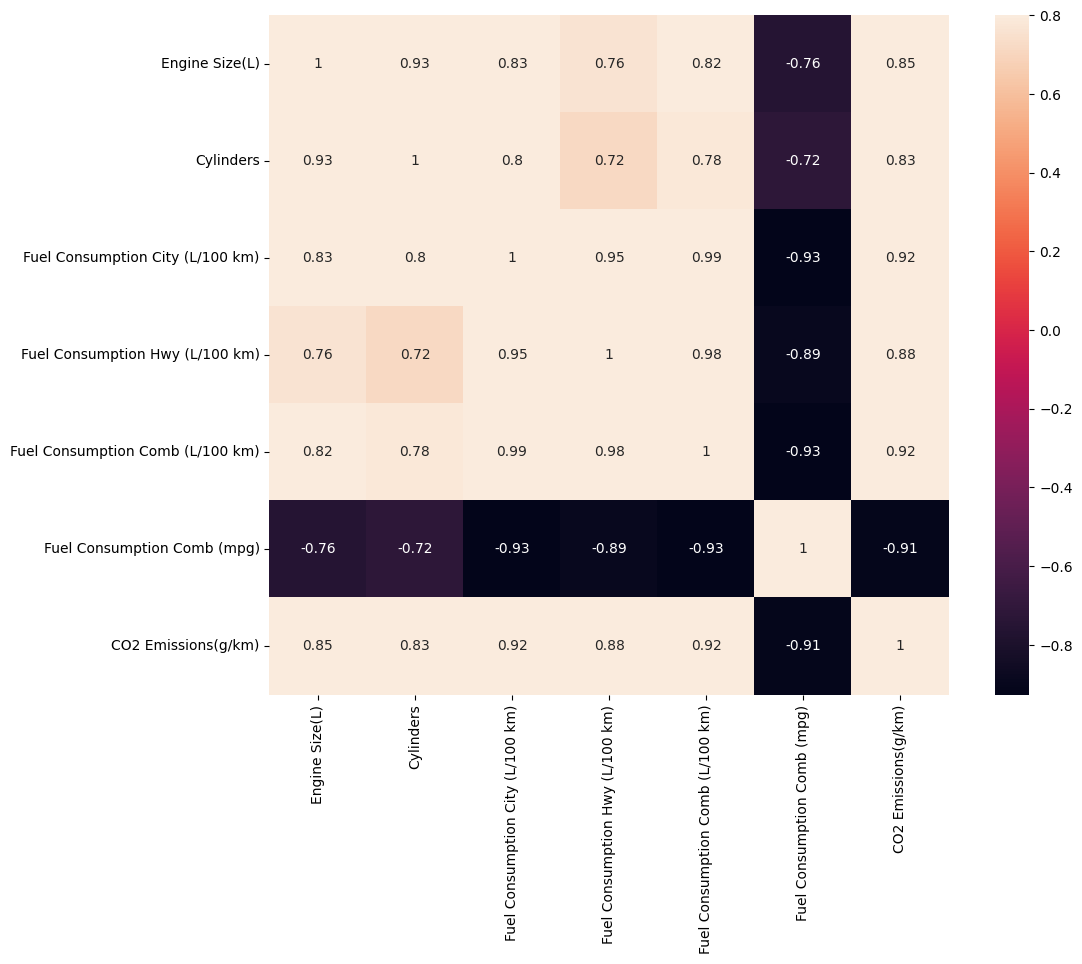

In [ ]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

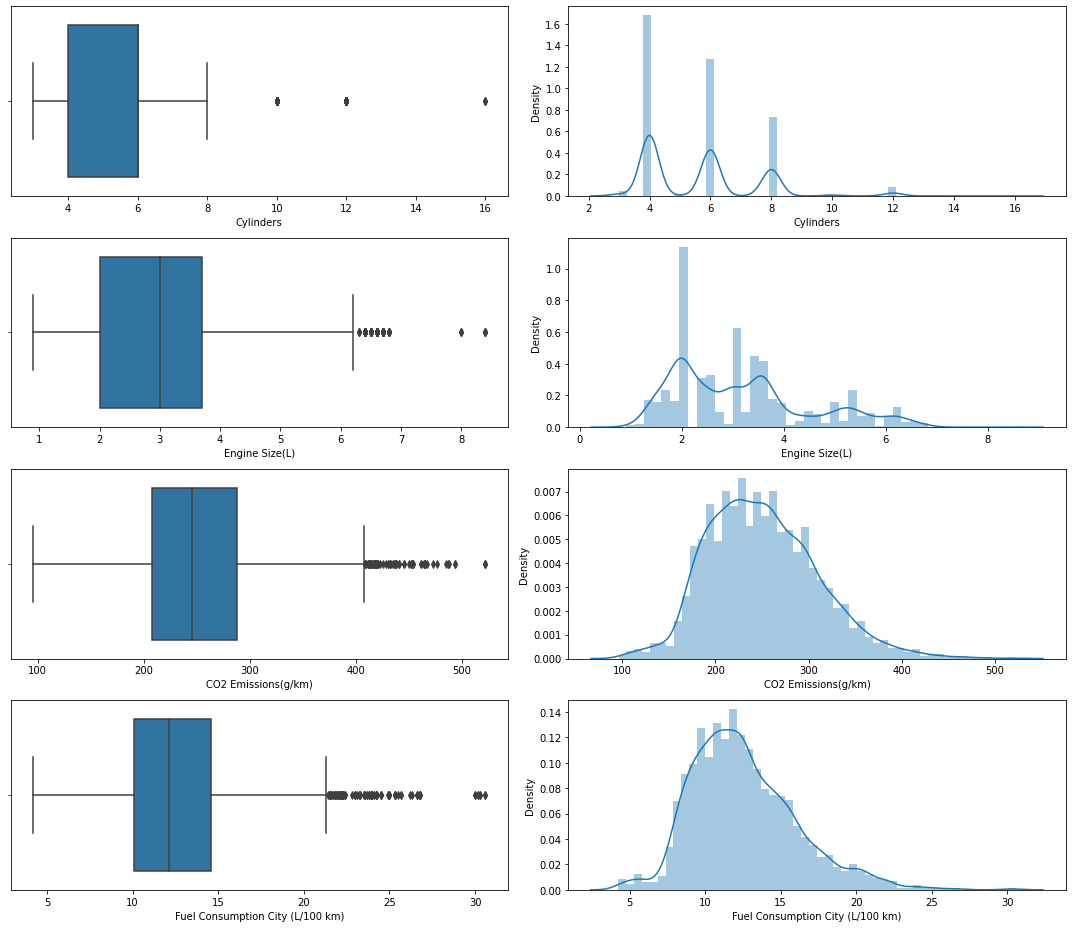

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["Cylinders"], ax = ax[0,0])
sns.distplot(df_train['Cylinders'], ax = ax[0,1])
sns.boxplot(x= df_train["Engine Size(L)"], ax = ax[1,0])
sns.distplot(df_train['Engine Size(L)'], ax = ax[1,1])
sns.boxplot(x= df_train["CO2 Emissions(g/km)"], ax = ax[2,0])
sns.distplot(df_train['CO2 Emissions(g/km)'], ax = ax[2,1])
sns.boxplot(x= df_train["Fuel Consumption City (L/100 km)"], ax = ax[3,0])
sns.distplot(df_train['Fuel Consumption City (L/100 km)'], ax = ax[3,1])
plt.tight_layout()

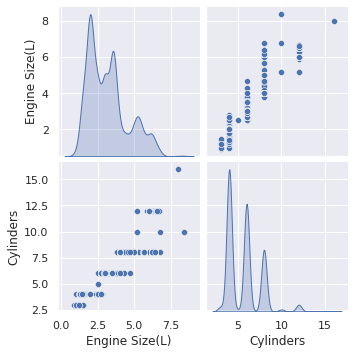

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [21]:
X = df_train.drop(['Model', 'Vehicle Class','Make','Transmission','Fuel Type'], axis = 1)
Y = df_train["Fuel Type"]
x_Data = X.values
y_Data = Y.values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [25]:
model.score(X_test,y_test)

0.5023696682464455

In [26]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.53807107 0.52284264 0.50592217 0.54360711 0.52074513]


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.5282667569397427

In [29]:
confusion_matrix(y_train, pred)

array([[   3,    0,  112,   17],
       [   0,  236,   17,   39],
       [ 110,  118, 1762,  929],
       [   4,  280, 1161, 1120]])

In [30]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [31]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [32]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           D       0.08      0.07      0.07        43
           E       0.37      0.74      0.49        78
           N       0.00      0.00      0.00         1
           X       0.54      0.60      0.57       718
           Z       0.51      0.40      0.45       637

    accuracy                           0.50      1477
   macro avg       0.30      0.36      0.32      1477
weighted avg       0.51      0.50      0.50      1477



In [33]:
cma = confusion_matrix(y_test, predicted_test)

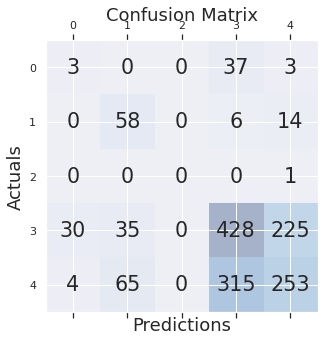

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier as rf

In [46]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [47]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8955653351387949

In [49]:
confusion_matrix(y_train, pred)

array([[ 123,    0,    0,    9],
       [   0,  292,    0,    0],
       [   0,    0, 2664,  255],
       [   0,    0,  353, 2212]])

In [48]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [50]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [51]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           D       0.95      0.95      0.95        43
           E       1.00      1.00      1.00        78
           N       0.00      0.00      0.00         1
           X       0.87      0.91      0.89       718
           Z       0.90      0.85      0.87       637

    accuracy                           0.89      1477
   macro avg       0.74      0.74      0.74      1477
weighted avg       0.89      0.89      0.89      1477



In [52]:
cma = confusion_matrix(y_test, pred_test)

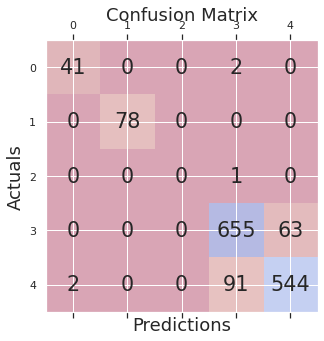

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [37]:
from sklearn import tree

In [38]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [39]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.9901828029790115

In [40]:
confusion_matrix(y_train, pred1)

array([[ 132,    0,    0,    0],
       [   0,  292,    0,    0],
       [   0,    0, 2900,   19],
       [   0,    0,   39, 2526]])

In [41]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [42]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           D       0.95      0.93      0.94        43
           E       1.00      1.00      1.00        78
           N       0.00      0.00      0.00         1
           X       0.92      0.94      0.93       718
           Z       0.93      0.91      0.92       637

    accuracy                           0.93      1477
   macro avg       0.76      0.76      0.76      1477
weighted avg       0.93      0.93      0.93      1477



In [43]:
cma = confusion_matrix(y_test, pred1_test)

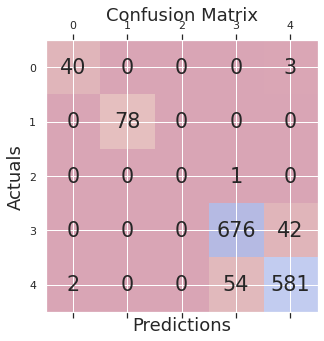

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [55]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.6420108327691266

In [56]:
confusion_matrix(y_train, pred_LR)

array([[   6,    0,   66,   60],
       [   0,  290,    2,    0],
       [   0,    0, 2110,  809],
       [   0,    0, 1178, 1387]])

In [57]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [58]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00        43
           E       0.99      0.97      0.98        78
           N       0.00      0.00      0.00         1
           X       0.62      0.72      0.67       718
           Z       0.60      0.53      0.56       637

    accuracy                           0.63      1477
   macro avg       0.44      0.44      0.44      1477
weighted avg       0.61      0.63      0.62      1477



In [59]:
cma = confusion_matrix(y_test, pred_LR_test)

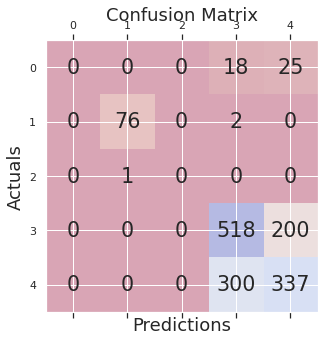

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [63]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.4940758293838863

In [64]:
confusion_matrix(y_train, pred_NN)

array([[   0,    0,  132,    0],
       [   0,    0,  292,    0],
       [   0,    0, 2919,    0],
       [   0,    0, 2565,    0]])

In [65]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [66]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00        43
           E       0.00      0.00      0.00        78
           N       0.00      0.00      0.00         1
           X       0.49      1.00      0.65       718
           Z       0.00      0.00      0.00       637

    accuracy                           0.49      1477
   macro avg       0.10      0.20      0.13      1477
weighted avg       0.24      0.49      0.32      1477



In [67]:
cma = confusion_matrix(y_test, pred_NN_test)

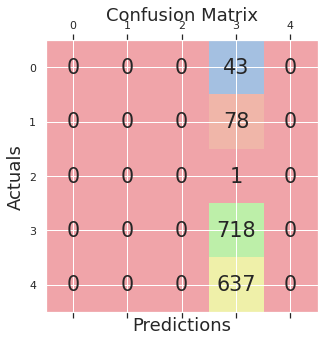

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [69]:
import xgboost as xgb

In [70]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [71]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.8647596479350034

In [72]:
confusion_matrix(y_train, pred_XGB)

array([[ 112,    0,    9,   11],
       [   0,  292,    0,    0],
       [   0,    0, 2553,  366],
       [   0,    0,  413, 2152]])

In [73]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [74]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           D       0.94      0.79      0.86        43
           E       0.99      0.97      0.98        78
           N       0.00      0.00      0.00         1
           X       0.85      0.88      0.87       718
           Z       0.85      0.83      0.84       637

    accuracy                           0.86      1477
   macro avg       0.73      0.70      0.71      1477
weighted avg       0.86      0.86      0.86      1477



In [75]:
cma = confusion_matrix(y_test, pred_XGB_test)

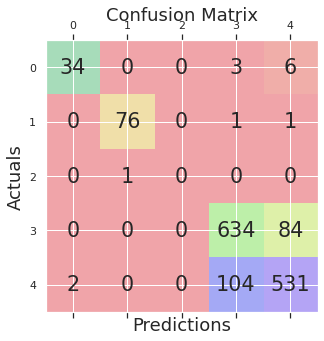

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

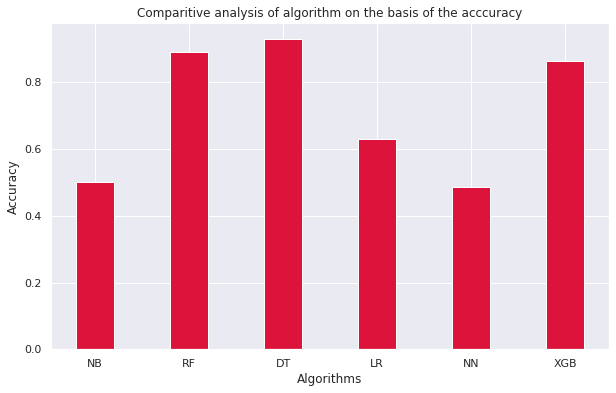

In [77]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


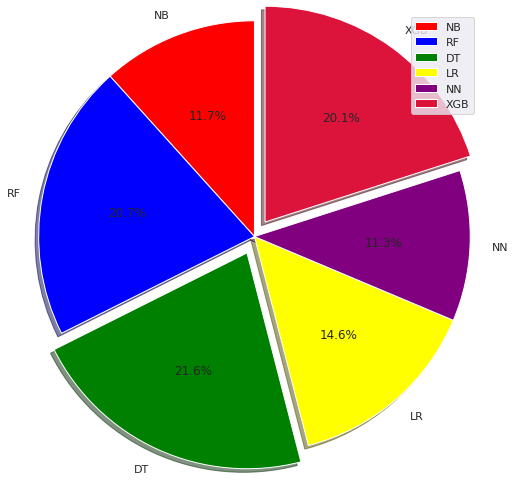

In [80]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()